In [155]:

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc,precision_recall_curve,confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder

data=pd.read_csv(r'D:\ML Final project\dataset_diabetes\diabetic_data.csv')
df = pd.DataFrame(data)
test_df = df


print('Shape of the test dataframe : ',test_df.shape)
print('Shape of the dataframe : ',df.shape)


Shape of the test dataframe :  (101766, 50)
Shape of the dataframe :  (101766, 50)


Weightage of value for age feature
 [70-80)     25.615628
[60-70)     22.092840
[50-60)     16.956547
[80-90)     16.898571
[40-50)      9.516931
[30-40)      3.709490
[90-100)     2.744532
[20-30)      1.628245
[10-20)      0.679009
[0-10)       0.158206
Name: age, dtype: float64


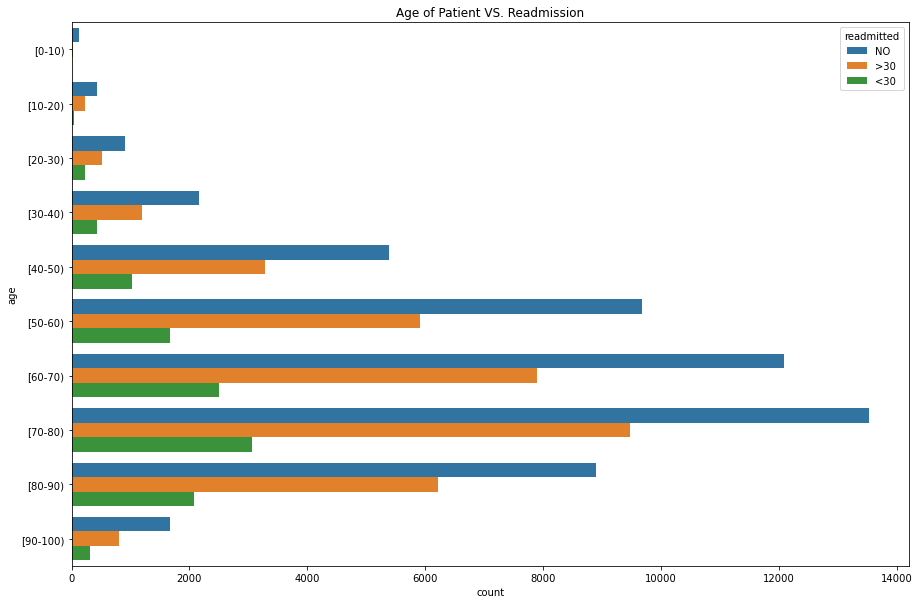

In [156]:
# Data insights

# 1. Age of Patient VS. Readmission

fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

print('Weightage of value for age feature\n',df['age'].value_counts(normalize=True) * 100)



Weightage of value for readmitted feature
 Caucasian          74.778413
AfricanAmerican    18.876639
?                   2.233555
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: race, dtype: float64


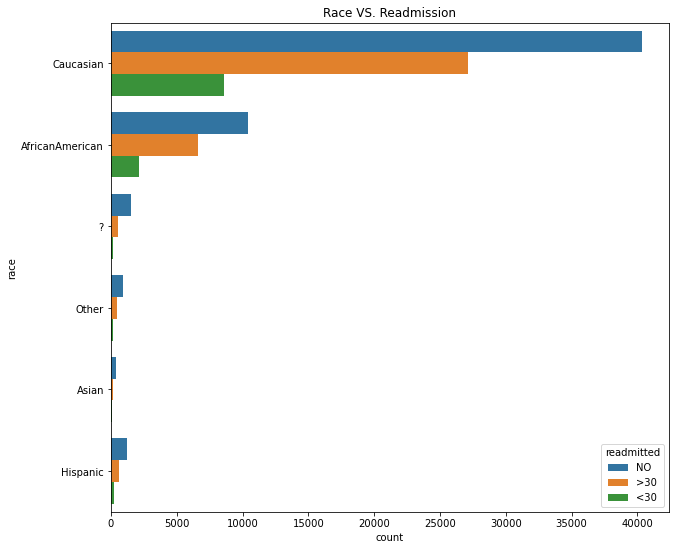

In [157]:
# 2. Race VS. Readmission

fig = plt.figure(figsize=(10,9))
sns.countplot(y = df['race'], hue = df['readmitted']).set_title('Race VS. Readmission')
print('Weightage of value for readmitted feature\n',df['race'].value_counts(normalize=True) * 100)

Weightage of value for max_glu_serum feature
 None    94.746772
Norm     2.551933
>200     1.459230
>300     1.242065
Name: max_glu_serum, dtype: float64


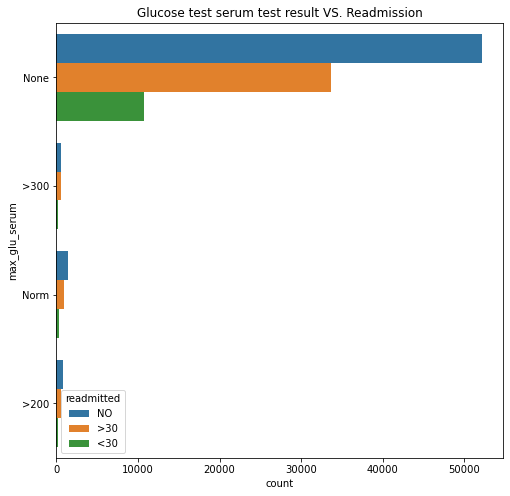

In [158]:
# 3. Glucose test serum test result VS. Readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['readmitted']).set_title('Glucose test serum test result VS. Readmission')

print('Weightage of value for max_glu_serum feature\n',df['max_glu_serum'].value_counts(normalize=True) * 100)


Weightage of value for A1Cresult feature
 None    83.277322
>8       8.073423
Norm     4.903406
>7       3.745848
Name: A1Cresult, dtype: float64


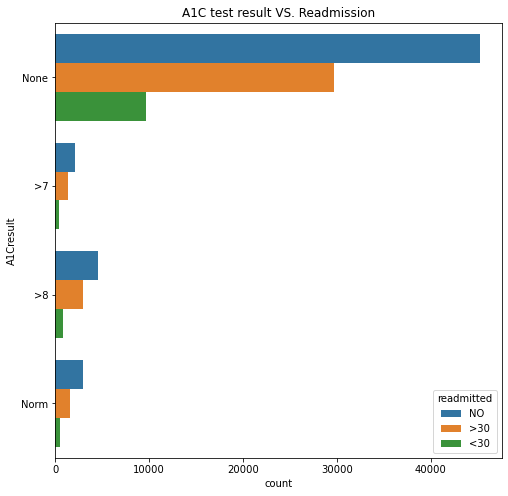

In [159]:
# 4. A1C test result VS. Readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(y= df['A1Cresult'], hue = df['readmitted']).set_title('A1C test result VS. Readmission')

print('Weightage of value for A1Cresult feature\n',df['A1Cresult'].value_counts(normalize=True) * 100)

Weightage of value for time_in_hospital feature
 3     17.447871
2     16.925103
1     13.961441
4     13.682369
5      9.793055
6      7.408172
7      5.757326
8      4.314801
9      2.949905
10     2.301358
11     1.822809
12     1.422872
13     1.189002
14     1.023918
Name: time_in_hospital, dtype: float64


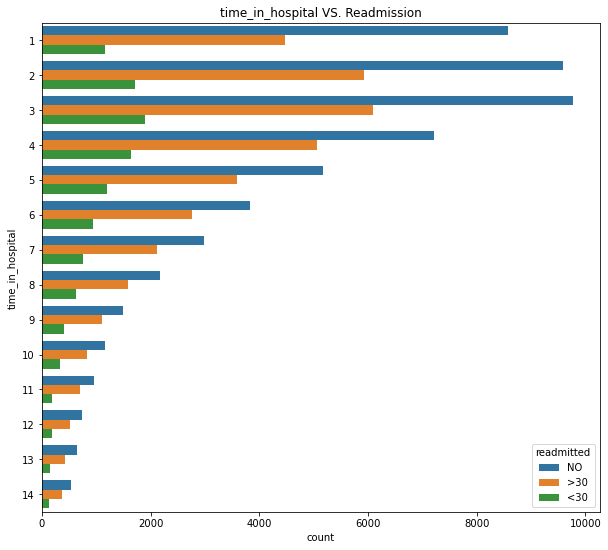

In [160]:
# 5. time_in_hospital VS. Readmission

fig = plt.figure(figsize=(10,9))
sns.countplot(y = df['time_in_hospital'], hue = df['readmitted']).set_title('time_in_hospital VS. Readmission')
print('Weightage of value for time_in_hospital feature\n',df['time_in_hospital'].value_counts(normalize=True) * 100)

Text(0.5, 1.0, 'medical_specialty VS. Readmission')

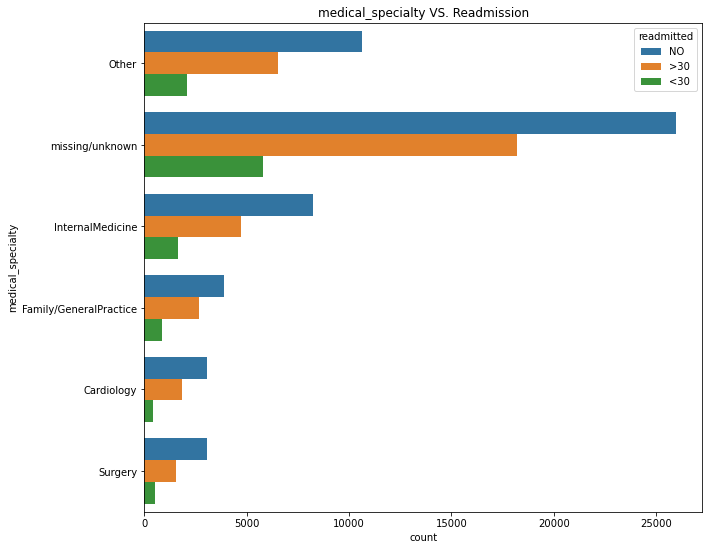

In [161]:
# replacing all categories of surgeries with surgery
# replacing ? with missing/unknown values
# grouping to other if not for Surgery,InternalMedicine, missing/unknown,Family/GeneralPractice,Cardiology

# 5. medical_specialty VS. Readmission

med_sp_surg = ['Surgery-General','Surgery-Cardiovascular/Thoracic','Surgery-Neuro','Surgery-Colon&Rectal','Surgery-Plastic',
               'Surgery-Thoracic','Surgery-PlasticwithinHeadandNeck','Surgery-Pediatric','Surgery-Maxillofacial','Surgeon',
               'Surgery-Vascular','Surgery-Cardiovascular','SurgicalSpecialty']
df['medical_specialty'] = df['medical_specialty'].replace(med_sp_surg, 'Surgery')

df.loc[df['medical_specialty'] == '?', 'medical_specialty'] = 'missing/unknown'

df['medical_specialty'] = np.where(
   (df['medical_specialty'] != 'Surgery') & (df['medical_specialty'] != 'missing/unknown') & 
    (df['medical_specialty'] != 'InternalMedicine') & (df['medical_specialty'] != 'Cardiology') 
    & (df['medical_specialty'] != 'Family/GeneralPractice'), 'Other', df['medical_specialty'])

fig = plt.figure(figsize=(10,9))
sns.countplot(y = df['medical_specialty'], hue = df['readmitted']).set_title('medical_specialty VS. Readmission')


In [162]:
# dropping irrelevant features

df.drop(['encounter_id','weight', 'payer_code'], axis=1,inplace=True)
print('Shape after dropping columns : ',df.shape)

# replacing ? values in medical_speciality to missing
df['medical_specialty'] = df['medical_specialty'].replace('?', 'missing')



# considering alive people
a = [11,13,14,19,20,21]
for i in a:
    index_names = df[(df['discharge_disposition_id'] == i)].index
    df.drop(index_names, inplace = True) 

print('Shape after considering alive records : ',df.shape)



Shape after dropping columns :  (101766, 47)
Shape after considering alive records :  (99343, 47)


In [163]:
import warnings
warnings.filterwarnings('ignore')

# drop duplicate rows based on patient number and keep last occurence

df.drop_duplicates(subset=['patient_nbr'], keep='first' ,inplace=True)
print('Shape after deleting duplicate entries : ',df.shape)

# dropping 'patient_nbr' features
df.drop(['patient_nbr'], axis=1,inplace=True)
print('Shape after dropping patient_nbr: ',df.shape)

# drop rows with gender unknown/invalid
df = df[df['gender'] != 'Unknown/Invalid'] 
print('Shape after deleting duplicate entries : ',df.shape)

# grouping age intervals to 3 groups namely <30, 30-60, >60
age30 = ['[0-10)','[10-20)','[20-30)']

df.replace(age30, '15',inplace=True)
df.replace('[30-40)', '35',inplace=True)
df.replace('[40-50)', '45',inplace=True)
df.replace('[50-60)', '55',inplace=True)
df.replace('[60-70)', '65',inplace=True)
df.replace('[70-80)', '75',inplace=True)
df.replace('[80-90)', '85',inplace=True)
df.replace('[90-100)', '95',inplace=True)

# grouping discharge disposition into two categories namely 'discharge to home' and 'otherwise'
df.loc[df['discharge_disposition_id'] == 1, 'discharge_disposition_id'] = 'discharge to home'
df.loc[df['discharge_disposition_id'] != 'discharge to home', 'discharge_disposition_id'] = 'otherwise'

        
#print(df.head(5))

Shape after deleting duplicate entries :  (69990, 47)
Shape after dropping patient_nbr:  (69990, 46)
Shape after deleting duplicate entries :  (69987, 46)


In [164]:
# categorizing diag_1 feature values in 9 categories

df.replace(to_replace=r'^[EV][0-9]*', value='Other', regex=True, inplace = True)
df_diag1 = df['diag_1']
new_diag1 =[]

for i in df_diag1:
    if ((i!='Other') and (i!='?')):
        if ((float(i) >=390 and float(i) <=459) or (float(i) == 785)):
            new_diag1.append('Circulatory')
        elif ((float(i) >=460 and float(i) <=519) or (float(i) == 786)):
            new_diag1.append('Respiratory')
        elif ((float(i) >=520 and float(i) <=579) or (float(i) == 787)):
            new_diag1.append('Digestive')
        elif (float(i) >=800 and float(i) <=999):
            new_diag1.append('Injury')
        elif (float(i) >=250 and float(i) < 251):
            new_diag1.append('Diabetes')
        elif (float(i) >=710 and float(i) <=739):
            new_diag1.append('Musculoskeletal')
        elif ((float(i) >=580 and float(i) <=629) or (float(i) == 788)):
            new_diag1.append('Genitourinary')
        elif ((float(i) >=140 and float(i) <=239)):
                new_diag1.append('Neoplasms')
        elif ((float(i) >=790 and float(i) <=799) or
              (float(i) >=240 and float(i) <=279 and float(i) !=250 ) or
              (float(i) == 780) or (float(i) == 781) or (float(i) == 784) or
              (float(i) >=680 and float(i) <=709) or
              (float(i) >=1 and float(i) <= 139) or
              (float(i) >=290 and float(i) <=319) or
              (float(i) >= 280 and float(i) <= 289) or
              (float(i) >= 320 and float(i) <= 359) or
              (float(i) >= 630 and float(i) <= 679) or
              (float(i) >= 360 and float(i) <= 389) or
              (float(i) >= 740 and float(i) <= 759) or
              (float(i) == 782)):
            new_diag1.append('Other')
        else:
            new_diag1.append('Other')
    else:
        new_diag1.append(i)

df.drop(['diag_1'], axis=1,inplace=True)

df['diag_1'] = new_diag1

# Renaming features

df.rename(columns={'A1Cresult': 'HbA1c', 
                   'discharge_disposition_id':'discharge_disposition',
                   'admission_source_id':'admission_source',
                   'admission_type_id':'admission_type'}, inplace = True)


In [165]:
# drop rows with '?' from race, diag_1 features
df = df[df['race'] != '?']
df = df[df['diag_1'] != '?'] 
print('Shape after deleting missing entries for race, diag_1 : ',df.shape)

Shape after deleting missing entries for race, diag_1 :  (68061, 46)


In [166]:
# dropping 'diag_2','diag_3' features
df.drop(['diag_2','diag_3'], axis=1,inplace=True)
print('Shape after diag_2,diag_3: ',df.shape)


Shape after diag_2,diag_3:  (68061, 44)


In [167]:
# data insights - % of no (not prescribed) for 24 medications

medic =['glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','glimepiride-pioglitazone','metformin-pioglitazone','metformin-rosiglitazone',
       'metformin','repaglinide','nateglinide','chlorpropamide','acetohexamide','tolbutamide','acarbose','miglitol','insulin',
             'troglitazone','tolazamide','glimepiride','glipizide','glyburide','pioglitazone','rosiglitazone','examide','citoglipton']
medication = []
no_percentage = []
for i in medic:
    med=df[i].value_counts(normalize=True) * 100
    for k,v in med.iteritems(): 
        if (k == 'No'):
            medication.append(i)
            no_percentage.append(round(v,4))

data = {'Medication':medication,'Not_prescribed%':no_percentage}
df_no_count = pd.DataFrame(data)
sorted_no = df_no_count.sort_values('Not_prescribed%',ascending=False)
print('Percentage of medications that are not prescribed\n')

print(sorted_no.to_string(index=False))

Percentage of medications that are not prescribed

               Medication  Not_prescribed%
              citoglipton         100.0000
 glimepiride-pioglitazone         100.0000
 glimepiride-pioglitazone         100.0000
  metformin-rosiglitazone         100.0000
                  examide         100.0000
   metformin-pioglitazone          99.9985
            acetohexamide          99.9985
             troglitazone          99.9956
      glipizide-metformin          99.9897
              tolbutamide          99.9765
                 miglitol          99.9706
               tolazamide          99.9559
           chlorpropamide          99.8972
                 acarbose          99.7135
      glyburide-metformin          99.3006
              nateglinide          99.2874
              repaglinide          98.6674
              glimepiride          94.7591
            rosiglitazone          93.3325
             pioglitazone          92.4700
                glyburide          88.9144
   

In [168]:

# dropping medications which are not prescribed in atleat 75% cases - code for this showing % of records for each medication
# considering only insulin as it prescribed in 50% cases.
medic.remove('insulin')
df.drop(medic, axis=1,inplace=True)
print('Shape after unimportant features: ',df.shape)

#df.to_csv(path_or_buf=r'C:\Users\ADMIN\Desktop\new_df.csv', index=False, mode='w')

Shape after unimportant features:  (68061, 22)


In [169]:
dff = df
factor = 3
f = ['num_lab_procedures','time_in_hospital','num_procedures','num_medications','number_outpatient',
     'number_emergency','number_inpatient','number_diagnoses']
for i in f:
    upper_lim = df[i].mean () + df[i].std () * factor
    lower_lim = df[i].mean () - df[i].std () * factor
    data = df[(df[i] < upper_lim) & (df[i] > lower_lim)]

print(data.shape)


(67836, 22)


In [170]:
for i in f:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())


1    50.830872
3    19.779316
2    17.930974
6     6.538252
5     4.459235
8     0.423150
7     0.024978
4     0.013223
Name: admission_type, dtype: float64
0        Other
1    emergency
2    emergency
3    emergency
4    emergency
5       urgent
6     elective
7    emergency
8       urgent
9     elective
Name: admission_type, dtype: object


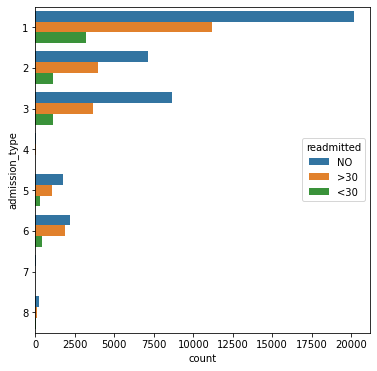

In [171]:
#race vs readmission
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
sns.countplot(y = df['admission_type'], hue = df['readmitted'])

# categorizing the race whose values are less than 5% into 'Other' group
class_count = df['admission_type'].value_counts(normalize= True) *100
print(class_count)

# categorizing admission_type feature into 3 categories
df.loc[df['admission_type'] == 1, 'admission_type'] = 'emergency'
df.loc[df['admission_type'] == 2, 'admission_type'] = 'urgent'
df.loc[df['admission_type'] == 3, 'admission_type'] = 'elective'

df['admission_type'] = np.where(
   (df['admission_type'] != 'emergency') & (df['admission_type'] != 'urgent') & (df['admission_type'] != 'elective') , 'Other', df['admission_type'])
print(df['admission_type'].head(10))



         Race_Name  Race_Count_%
0        Caucasian         76.85
1  AfricanAmerican         18.54
2         Hispanic          2.19
3            Other          1.69
4            Asian          0.72


<AxesSubplot:title={'center':'Count (target)'}>

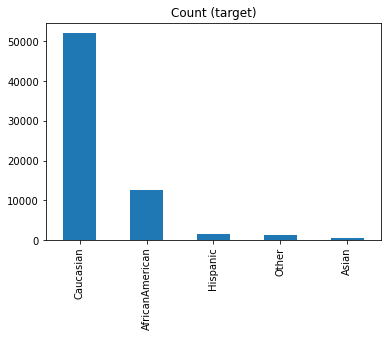

In [172]:

# categorizing the race whose values are less than 5% into 'Other' group
df= data
races = ['Caucasian','AfricanAmerican','Hispanic','Other','Asian']
class_count = df['race'].value_counts()
j = 0
race_count = []
race_name = []
for i in class_count:
    sum = i/(class_count.sum()) * 100
    race_count.append(round(sum,2))
    race_name.append(races[j])
    j = j+1

race_data= {'Race_Name':race_name,'Race_Count_%':race_count}
df_race_data = pd.DataFrame(race_data)
print(df_race_data)
class_count.plot(kind='bar', title='Count (target)')



Caucasian          52135
AfricanAmerican    12580
Other               3121
Name: race, dtype: int64


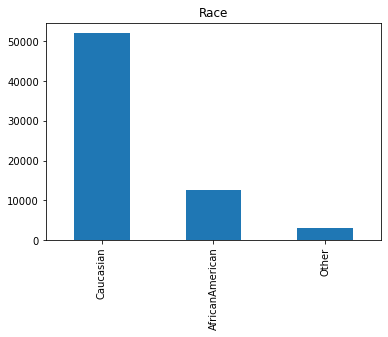

In [173]:
df.replace('Hispanic', 'Other',inplace=True)
df.replace('Asian', 'Other',inplace=True)

race_count_after = df['race'].value_counts()
print(race_count_after)
race_count_after.plot(kind='bar', title='Race');

7     36430
1     21048
17     4738
4      2355
6      1556
2       850
5       506
20      152
3       136
9        39
8        10
10        6
22        4
14        2
25        2
11        1
13        1
Name: admission_source, dtype: int64


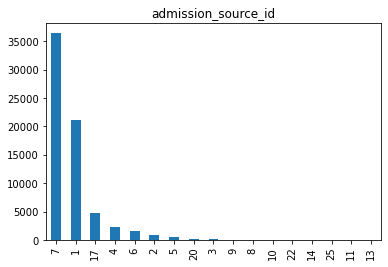

In [174]:
ad_source_count = df['admission_source'].value_counts()
print(ad_source_count)
ad_source_count.plot(kind='bar', title='admission_source_id');





In [175]:
# categorizing admission_source feature into 3 categories
df.loc[df['admission_source'] == 7, 'admission_source'] = 'emergency room'
df.loc[df['admission_source'] == 1, 'admission_source'] = 'physician referred'

df['admission_source'] = np.where(
   (df['admission_source'] != 'physician referred') & (df['admission_source'] != 'emergency room') , 'Other', df['admission_source']
   )
print(df['admission_source'].head(10))

1     emergency room
2     emergency room
3     emergency room
4     emergency room
5              Other
6              Other
7     emergency room
8              Other
9              Other
10    emergency room
Name: admission_source, dtype: object


In [176]:
# categorizing A1Cresult,max_glu_serum features

df['HbA1c'] = df['HbA1c'].replace('>7', 1)
df['HbA1c'] = df['HbA1c'].replace('>8', 1)
df['HbA1c'] = df['HbA1c'].replace('Norm', 0)
df['HbA1c'] = df['HbA1c'].replace('None', -1000)

df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -1000)

1    34444
3    13434
2    12175
6     4436
5     3033
8      288
7       17
4        9
Name: admission_type, dtype: int64


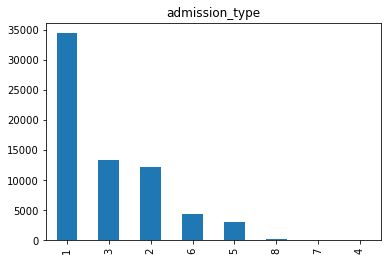

In [177]:

admission_type_count = df['admission_type'].value_counts()
print(admission_type_count)
admission_type_count.plot(kind='bar', title='admission_type');





In [178]:
df.to_csv(path_or_buf=r'C:\Users\ADMIN\Desktop\new_df.csv', index=False, mode='w')

In [179]:
#df.dtypes


df.replace(to_replace='?', value='NaN', inplace = True)
t = df.isna().sum()
print(t)

for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == 'NaN'].count())

race                     0
gender                   0
age                      0
admission_type           0
discharge_disposition    0
admission_source         0
time_in_hospital         0
medical_specialty        0
num_lab_procedures       0
num_procedures           0
num_medications          0
number_outpatient        0
number_emergency         0
number_inpatient         0
number_diagnoses         0
max_glu_serum            0
HbA1c                    0
insulin                  0
change                   0
diabetesMed              0
readmitted               0
diag_1                   0
dtype: int64
race 0
gender 0
age 0
discharge_disposition 0
admission_source 0
medical_specialty 0
insulin 0
change 0
diabetesMed 0
readmitted 0
diag_1 0


In [213]:
# With cross validation

print(df.columns)


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import statistics
from sklearn.multiclass import OneVsRestClassifier

data=pd.read_csv(r'C:\Users\ADMIN\Desktop\new_df.csv')
df = pd.DataFrame(data)

test_df = df
    
print(df.shape)

Index(['race', 'gender', 'age', 'admission_type', 'discharge_disposition',
       'admission_source', 'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'HbA1c', 'insulin', 'change',
       'diabetesMed', 'readmitted', 'diag_1'],
      dtype='object')
(67836, 22)


In [210]:
#one hot encoding
encoded_columns = pd.get_dummies(df['diag_1'])
data = df.join(encoded_columns).drop('diag_1', axis=1)

'''
# label encoding
label_encoder = LabelEncoder() 
for col_name in data.columns:
    data[col_name] = label_encoder.fit_transform(data[col_name])
print(data.shape)
'''
print(data.shape)

(67836, 30)


In [212]:
x = pd.get_dummies(x,drop_first=True)

Correlation matrix



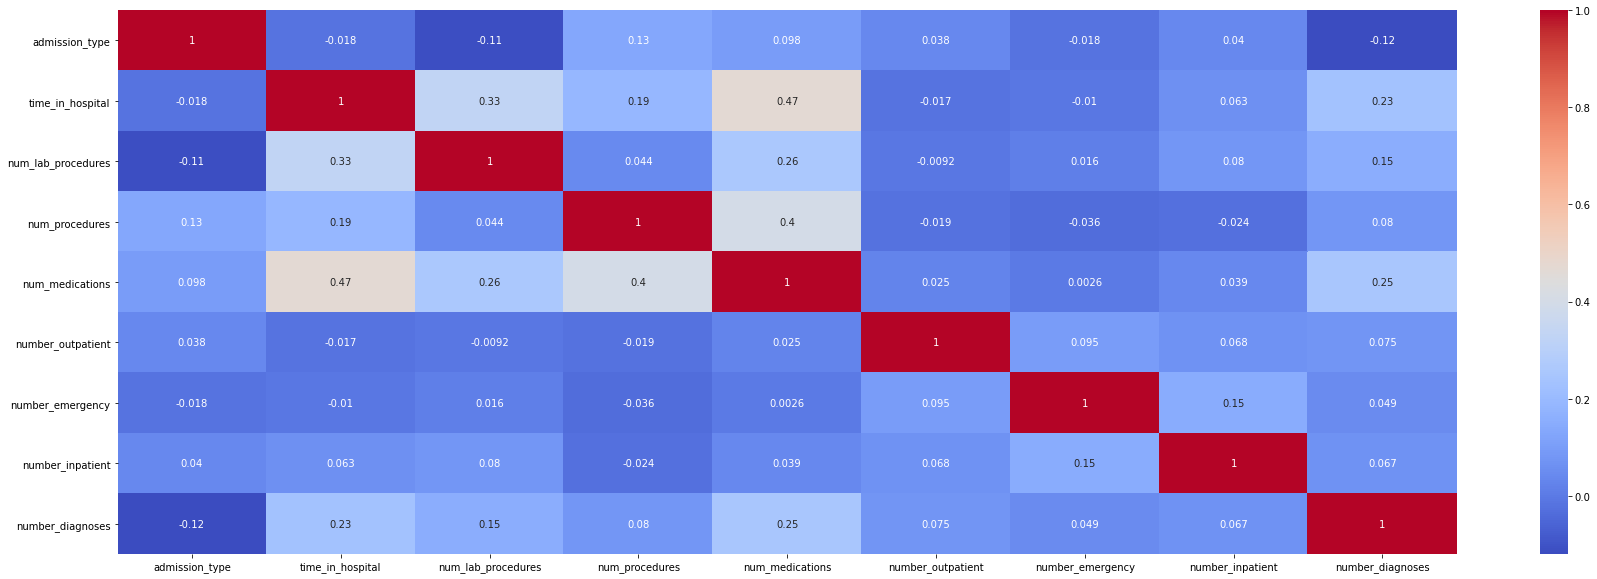

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
print('Correlation matrix\n')
g=sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

In [214]:
from sklearn.feature_selection import SelectKBest, chi2



y = data['readmitted']
x = data.drop('readmitted', axis=1)
print('target : ', y.shape)
print('features : ',x.shape)

x = pd.get_dummies(x,drop_first=True)

print('after one hot encoding shape of x',x.shape,'\t',y.shape)


target :  (67836,)
features :  (67836, 21)
after one hot encoding shape of x (67836, 36) 	 (67836,)


In [215]:
from imblearn.under_sampling import TomekLinks 
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

smote_sampler = SMOTE(sampling_strategy='minority')
tomek_sampler = TomekLinks(sampling_strategy='majority')

print('\nBalanced sampling using SMOTETomek:')

smt = SMOTETomek(random_state=52,smote=smote_sampler,tomek=tomek_sampler)
X, Y = smt.fit_resample(x, y)
print('SMOTETomek Resampled dataset shape %s' % Counter(Y))


Balanced sampling using SMOTETomek:
SMOTETomek Resampled dataset shape Counter({'NO': 39953, '<30': 39572, '>30': 21751})


In [216]:
import time
# without cross validation

x_train, x_test, y_train, y_test =\
        train_test_split(X, Y, test_size=0.33, random_state=0)
print('\nTrain dataset shape : ',x_train.shape,'\nTest dataset shape : ', x_test.shape)



Train dataset shape :  (67854, 36) 
Test dataset shape :  (33422, 36)



 DTC classifier onevsrest accuracy :  0.7042768296636897
roc_auc for DECISION TREE 



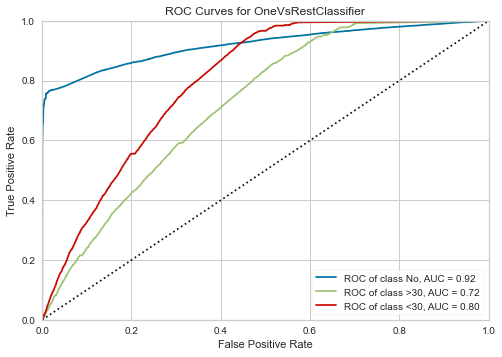


Classification Report: 
               precision    recall  f1-score   support

         <30       0.97      0.76      0.85     26438
         >30       0.53      0.20      0.29     14681
          NO       0.59      0.93      0.72     26735

    accuracy                           0.70     67854
   macro avg       0.70      0.63      0.62     67854
weighted avg       0.73      0.70      0.68     67854


Confusion Matrix: 
 [[20118   838  5482]
 [  320  2865 11496]
 [  272  1658 24805]]

Run time for Decision tree : 6.1  seconds


In [284]:
# Decision tree classifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier.rocauc import roc_auc

start = time.time()
DTCClassifier= DecisionTreeClassifier(criterion = 'entropy',max_depth=10)

ovr_dtc = OneVsRestClassifier(DTCClassifier).fit(x_train,y_train)
print('\n DTC classifier onevsrest accuracy : ',ovr_dtc.score(x_train,y_train))
#y_pred = ovr_dtc.predict(x_test)

#pred_prob = ovr_dtc.predict_proba(x_test)
#y_pred_prob_dtree = ovr_dtc.predict_proba(x_test)
#fpr_dtree, tpr_dtree, thresholds_Tree = roc_curve(y_test, y_pred_prob_dtree)

print('roc_auc for DECISION TREE \n')
roc_auc(ovr_dtc, x_train, y_train, X_test=x_test, y_test=y_test, classes=['No','>30','<30'], macro=False,micro=False)


end = time.time()
print('\nClassification Report: \n {}\n'.format(classification_report(y_train, ovr_dtc.predict(x_train))))
print('Confusion Matrix: \n {}\n'.format(confusion_matrix(y_train, ovr_dtc.predict(x_train))))
print('Run time for Decision tree :',round(end-start, 2),' seconds')


 KNN classifier accuracy :  0.6825537182774781
roc_auc for KNN 



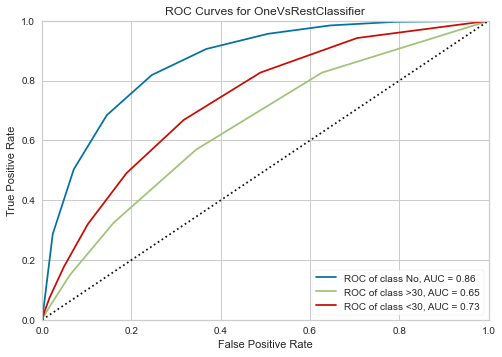


Classification Report: 
               precision    recall  f1-score   support

         <30       0.68      0.93      0.79     26438
         >30       0.63      0.24      0.35     14681
          NO       0.70      0.68      0.69     26735

    accuracy                           0.68     67854
   macro avg       0.67      0.62      0.61     67854
weighted avg       0.68      0.68      0.65     67854


Confusion Matrix: 
 [[24525   410  1503]
 [ 4642  3551  6488]
 [ 6790  1707 18238]]

Run time for KNN : 1190.67  seconds


In [285]:
# KNN classifier

start = time.time()
KNNClassifier = KNeighborsClassifier(n_neighbors=8)

ovr_knn = OneVsRestClassifier(KNNClassifier).fit(x_train,y_train)
print('\n KNN classifier accuracy : ',ovr_knn.score(x_train,y_train))
y_pred= ovr_knn.predict(x_train)
print('roc_auc for KNN \n')
roc_auc(ovr_knn, x_train, y_train, X_test=x_test, y_test=y_test, classes=['No','>30','<30'], macro=False,micro=False)

end = time.time()

print('\nClassification Report: \n {}\n'.format(classification_report(y_train, y_pred)))
print('Confusion Matrix: \n {}\n'.format(confusion_matrix(y_train, y_pred)))
print('Run time for KNN :',round(end-start, 2),' seconds')


 Bagging classifier accuracy :  0.8225454652636544
roc_auc for Bagging - Decision tree 



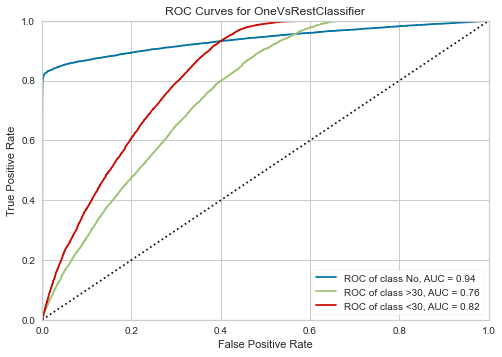


Classification Report: 
               precision    recall  f1-score   support

         <30       1.00      0.88      0.94     26438
         >30       0.93      0.42      0.58     14681
          NO       0.70      0.99      0.82     26735

    accuracy                           0.82     67854
   macro avg       0.87      0.76      0.78     67854
weighted avg       0.86      0.82      0.81     67854


Confusion Matrix: 
 [[23254   177  3007]
 [   12  6119  8550]
 [    7   288 26440]]

Run time for Random forest : 20.76  seconds


In [296]:
# Bagging with decision tree

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

start = time.time()
DTCClassifier= DecisionTreeClassifier(criterion = 'entropy',max_depth=17)

bg = BaggingClassifier(base_estimator=DTCClassifier)
ovr_bagg = OneVsRestClassifier(bg).fit(x_train,y_train)
print('\n Bagging classifier accuracy : ',ovr_bagg.score(x_train,y_train))

y_pred =ovr_bagg.predict(x_train)
print('roc_auc for Bagging - Decision tree \n')
roc_auc(ovr_bagg, x_train, y_train, X_test=x_test, y_test=y_test, classes=['No','>30','<30'], macro=False,micro=False)

end = time.time()
print("\nClassification Report: \n {}\n".format(classification_report(y_train, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, y_pred)))
print('Run time for Random forest :',round(end-start, 2),' seconds')


 RFC classifier accuracy :  0.8306068912665429


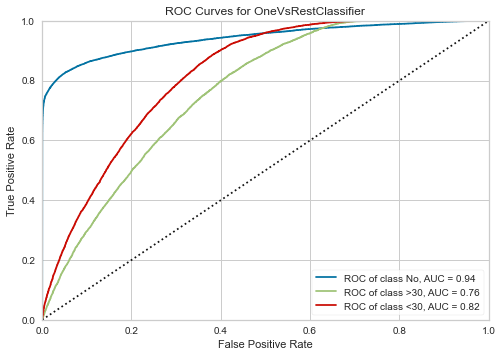

roc_auc ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for OneVsRestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary=None, classes=['No', '>30', '<30'], macro=False, micro=False,
       model=None)
Classification Report: 
               precision    recall  f1-score   support

         <30       0.97      0.85      0.91     26438
         >30       0.71      0.70      0.70     14681
          NO       0.78      0.88      0.83     26735

    accuracy                           0.83     67854
   macro avg       0.82      0.81      0.81     67854
weighted avg       0.84      0.83      0.83     67854


Confusion Matrix: 
 [[22590  1390  2458]
 [  209 10238  4234]
 [  458  2745 23532]]

Run time for Random forest : 63.35  seconds


In [277]:
# random forest classifier

from sklearn.ensemble import RandomForestClassifier

start = time.time()
rfc = RandomForestClassifier(n_estimators=100,max_depth=15, class_weight='balanced', random_state=32)
ovr_rfc = OneVsRestClassifier(rfc).fit(x_train,y_train)
print('\n RFC classifier accuracy : ',ovr_rfc.score(x_train,y_train))

y_pred =ovr_rfc.predict(x_train)
print('roc_auc for RANDOM FOREST \n')
roc_auc(ovr_rfc, x_train, y_train, X_test=x_test, y_test=y_test, classes=['No','>30','<30'], macro=False,micro=False)


end = time.time()
print("\nClassification Report: \n {}\n".format(classification_report(y_train, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, y_pred)))
print('Run time for Random forest :',round(end-start, 2),' seconds')

In [259]:
# Guassian Naive bayes classifier
start = time.time()
GNBClassifier= GaussianNB()
ovr_gnb = OneVsRestClassifier(GNBClassifier).fit(x_train,y_train)
print('\n GNB classifier accuracy : ',ovr_gnb.score(x_train,y_train))
y_pred = ovr_gnb.predict(x_train)
end = time.time()

print("Classification Report: \n {}\n".format(classification_report(y_train, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, y_pred)))
print('Run time for Naive bayes :',round(end-start, 2),' seconds')


 GNB classifier accuracy :  0.5156512512158458
Classification Report: 
               precision    recall  f1-score   support

         <30       0.52      0.76      0.62     26438
         >30       0.34      0.13      0.19     14681
          NO       0.55      0.49      0.52     26735

    accuracy                           0.52     67854
   macro avg       0.47      0.46      0.44     67854
weighted avg       0.49      0.52      0.48     67854


Confusion Matrix: 
 [[20087  1400  4951]
 [ 7213  1867  5601]
 [11541  2159 13035]]

Run time for Naive bayes : 1.49  seconds



 BernoulliNB classifier accuracy :  0.5634155687210776
roc_auc for NAIVE BAYES



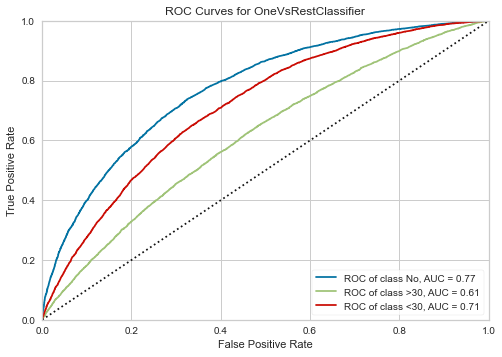

Classification Report: 
               precision    recall  f1-score   support

         <30       0.60      0.69      0.64     26438
         >30       0.43      0.02      0.04     14681
          NO       0.54      0.73      0.62     26735

    accuracy                           0.56     67854
   macro avg       0.52      0.48      0.43     67854
weighted avg       0.54      0.56      0.50     67854


Confusion Matrix: 
 [[18337   130  7971]
 [ 5469   309  8903]
 [ 6863   288 19584]]

Run time for Bernoulli naive bayes : 3.08  seconds


In [279]:
# Multinomial Naive bayes classifier

from sklearn.naive_bayes import BernoulliNB

start = time.time()
MultinomialNB= BernoulliNB()
ovr_gnb = OneVsRestClassifier(MultinomialNB).fit(x_train,y_train)
print('\n BernoulliNB classifier accuracy : ',ovr_gnb.score(x_train,y_train))
y_pred = ovr_gnb.predict(x_train)

print('roc_auc for NAIVE BAYES\n')
roc_auc(ovr_gnb, x_train, y_train, X_test=x_test, y_test=y_test, classes=['No','>30','<30'], macro=False,micro=False)
end = time.time()

print("Classification Report: \n {}\n".format(classification_report(y_train, y_pred )))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, y_pred)))
print('Run time for Bernoulli naive bayes :',round(end-start, 2),' seconds')


 ETC classifier accuracy :  0.8892180269401951
roc_auc for EXTRA TREES



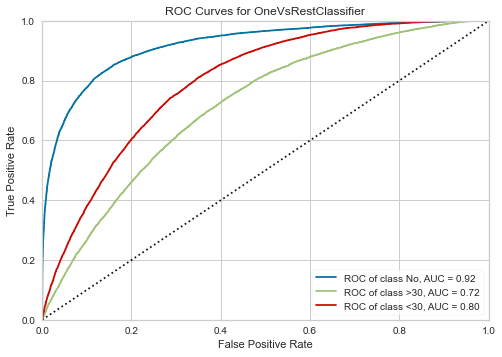

Classification Report: 
               precision    recall  f1-score   support

         <30       0.82      0.98      0.89     26438
         >30       0.94      0.82      0.87     14681
          NO       0.96      0.84      0.90     26735

    accuracy                           0.89     67854
   macro avg       0.90      0.88      0.89     67854
weighted avg       0.90      0.89      0.89     67854


Confusion Matrix: 
 [[25875   230   333]
 [ 2059 11974   648]
 [ 3682   565 22488]]

Run time for Extra tree : 91.97  seconds


In [280]:
# extra tree classifier

from sklearn.ensemble import ExtraTreesClassifier

start = time.time()
etc = ExtraTreesClassifier(n_estimators=100, max_depth=20, criterion='entropy',class_weight='balanced',random_state=32)
ovr_etc = OneVsRestClassifier(etc).fit(x_train,y_train)
print('\n ETC classifier accuracy : ',ovr_etc.score(x_train,y_train))
y_pred =  ovr_etc.predict(x_train)
print('roc_auc for EXTRA TREES\n')
roc_auc(ovr_etc, x_train, y_train, X_test=x_test, y_test=y_test, classes=['No','>30','<30'], macro=False,micro=False)

end = time.time()
print("Classification Report: \n {}\n".format(classification_report(y_train,y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, y_pred)))
print('Run time for Extra tree :',round(end-start, 2),' seconds')


 ETC classifier accuracy :  0.5405134553600377
roc_auc for SVM 



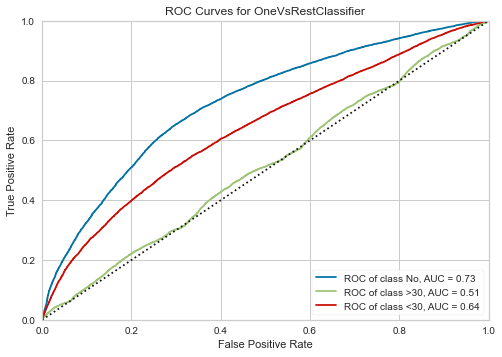

Classification Report: 
               precision    recall  f1-score   support

         <30       0.57      0.70      0.63     26438
         >30       0.36      0.02      0.04     14681
          NO       0.52      0.66      0.58     26735

    accuracy                           0.54     67854
   macro avg       0.48      0.46      0.42     67854
weighted avg       0.50      0.54      0.48     67854


Confusion Matrix: 
 [[18617   136  7685]
 [ 5568   327  8786]
 [ 8570   433 17732]]

Run time for SVM : 3388.54  seconds


In [323]:
# Linear models - SVM
from sklearn import svm

start = time.time()
SVMlinearClassifier=svm.SVC(gamma='auto')
SVMlinearClassifier=svm.SVC(gamma='scale')

ovr_svm = OneVsRestClassifier(SVMlinearClassifier).fit(x_train,y_train)
print('\n SVM classifier accuracy : ',ovr_svm.score(x_train,y_train))

print('roc_auc for SVM \n')
roc_auc(ovr_svm, x_train, y_train, X_test=x_test, y_test=y_test, classes=['No','>30','<30'], macro=False,micro=False)


end = time.time()
print("Classification Report: \n {}\n".format(classification_report(y_train, ovr_svm.predict(x_train))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, ovr_svm.predict(x_train))))
print('Run time for SVM :',round(end-start, 2),' seconds')

In [ ]:
# neural networks

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# define baseline model

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, x_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Statistical difference b/w Decision tree, random forest, extra tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold

dtc= DecisionTreeClassifier(criterion = 'entropy',max_depth=17)
etc = ExtraTreesClassifier(n_estimators=100, max_depth=20, criterion='entropy',class_weight='balanced',random_state=32)
rfc = RandomForestClassifier(n_estimators=100,max_depth=15, class_weight='balanced', random_state=32)

fold = KFold(n_splits=10, random_state=None)

ovr_etc = OneVsRestClassifier(etc)
ovr_rfc = OneVsRestClassifier(rfc)
ovr_dtc = OneVsRestClassifier(dtc)

BDTC_cross_score = cross_val_score(ovr_dtc, x, y, cv=fold)
RFC_cross_score = cross_val_score(ovr_rfc, x, y, cv=fold)
ETC_cross_score = cross_val_score(ovr_etc, X, Y, cv=fold)



In [321]:
dtc_mean=BDTC_cross_score.mean().round(3)
rfc_mean=RFC_cross_score.mean().round(3)
etc_mean=ETC_cross_score.mean().round(3)

dtc_std=round(statistics.stdev(BDTC_cross_score),3)
rfc_std=round(statistics.stdev(RFC_cross_score),3)
etc_std=round(statistics.stdev(ETC_cross_score),3)

dtc_list = []
rfc_list = []
etc_list = []
indexing = []
fold_Size = 10;
print('Cross validation with onevsrest classifier for multiclass\n')
print('---------------------------------------------------------------------------------------------------------')
print('Fold\t\tDecision tree\tRandom forest\tExtra tree')
print('---------------------------------------------------------------------------------------------------------')
for i in range(fold_Size):
    print(i+1,'\t\t', BDTC_cross_score[i].round(3),'\t\t',RFC_cross_score[i].round(3),'\t\t',ETC_cross_score[i].round(3))
    
    dtc_list.append(BDTC_cross_score[i].round(3))
    rfc_list.append(RFC_cross_score[i].round(3))
    etc_list.append(ETC_cross_score[i].round(3))
    indexing.append(i+1)
    
print('---------------------------------------------------------------------------------------------------------')
print('Avg score\t',dtc_mean,'\t\t',rfc_mean,'\t\t',etc_mean)
print('Std dev\t\t',dtc_std,'\t\t',rfc_std,'\t\t',etc_std)
print('---------------------------------------------------------------------------------------------------------')


Cross validation with onevsrest classifier for multiclass

---------------------------------------------------------------------------------------------------------
Fold		Decision tree	Random forest	Extra tree
---------------------------------------------------------------------------------------------------------
1 		 0.508 		 0.535 		 0.465
2 		 0.555 		 0.566 		 0.524
3 		 0.6 		 0.617 		 0.507
4 		 0.559 		 0.604 		 0.464
5 		 0.476 		 0.508 		 0.49
6 		 0.506 		 0.521 		 0.499
7 		 0.542 		 0.532 		 0.663
8 		 0.545 		 0.524 		 0.951
9 		 0.592 		 0.538 		 0.946
10 		 0.621 		 0.516 		 0.948
---------------------------------------------------------------------------------------------------------
Avg score	 0.551 		 0.546 		 0.646
Std dev		 0.045 		 0.038 		 0.216
---------------------------------------------------------------------------------------------------------


In [320]:
from statistics import mean 
from scipy import stats

signi_df1 = pd.DataFrame({
                     "Decision tree" : dtc_list,
                     "Extra tree" : etc_list,
                     "Random forest" : rfc_list
                    },
                    index = indexing)

diff_mean_list = []


dt_etc = signi_df1['Decision tree'] - signi_df1['Extra tree']
dt_etc_diff = dt_etc.tolist()
dt_etc_diff.append(round(mean(dt_etc_diff),3))
dt_etc_diff.append(round(statistics.pstdev(dt_etc_diff),3))
dt_etc_diff.append('---------')

dt_rfc = signi_df1['Decision tree'] - signi_df1['Random forest']
dt_rfc_diff = dt_rfc.tolist()
dt_rfc_diff.append(round(mean(dt_rfc_diff),3))
dt_rfc_diff.append(round(statistics.pstdev(dt_rfc_diff),3))
dt_rfc_diff.append('---------')

etc_rfc = signi_df1['Extra tree'] - signi_df1['Random forest']
etc_rfc_diff = etc_rfc.tolist()
etc_rfc_diff.append(round(mean(etc_rfc_diff),3))
etc_rfc_diff.append(round(statistics.pstdev(etc_rfc_diff),3))
etc_rfc_diff.append('---------')

print('')

print('')



t_dt_etc,p_dt_etc =stats.ttest_rel(signi_df1['Decision tree'],signi_df1['Extra tree'])
t_dt_rfc,p_dt_rfc =stats.ttest_rel(signi_df1['Decision tree'],signi_df1['Random forest'])
t_etc_rfc,p_etc_rfc =stats.ttest_rel(signi_df1['Extra tree'],signi_df1['Random forest'])

dt_etc_diff.append(round(p_dt_etc,3))
dt_rfc_diff.append(round(p_dt_rfc,3))
etc_rfc_diff.append(round(p_etc_rfc,3))

signi_df = pd.DataFrame(
                    {"DT-ETC" : dt_etc_diff,
                    "DT-RFC" : dt_rfc_diff,
                     "ETC-RFC" : etc_rfc_diff,
                     
                    },
                    index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,'Avg score','Std dev','---------','pvalue'])

print('Paired t-test for statistical difference\n')

print('--------------------------------------------------')
print('     Diff in accuracies for each fold')
print('--------------------------------------------------')

print(signi_df)



Paired t-test for statistical difference

--------------------------------------------------
     Diff in accuracies for each fold
--------------------------------------------------
              DT-ETC     DT-RFC    ETC-RFC
1              0.043     -0.027      -0.07
2              0.031     -0.011     -0.042
3              0.093     -0.017      -0.11
4              0.095     -0.045      -0.14
5             -0.014     -0.032     -0.018
6              0.007     -0.015     -0.022
7             -0.121       0.01      0.131
8             -0.406      0.021      0.427
9             -0.354      0.054      0.408
10            -0.327      0.105      0.432
Avg score     -0.095      0.004        0.1
Std dev        0.176      0.041      0.212
---------  ---------  ---------  ---------
pvalue         0.156      0.772      0.211
